**Quantitative analysis using pynance and TaLib**

In [63]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas_ta as ta
import pynance as pn

In [64]:
# Load your stock price data into a pandas DataFrame. Ensure your data includes columns like Open, High, Low, Close, and Volume.
data = pd.read_csv('GOOG_historical_data.csv')
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2004-08-19    2.490664    2.591785    2.390042    2.499133    2.496292   
1     2004-08-20    2.515820    2.716817    2.503118    2.697639    2.694573   
2     2004-08-23    2.758411    2.826406    2.716070    2.724787    2.721690   
3     2004-08-24    2.770615    2.779581    2.579581    2.611960    2.608991   
4     2004-08-25    2.614201    2.689918    2.587302    2.640104    2.637103   
...          ...         ...         ...         ...         ...         ...   
5015  2024-07-24  175.389999  177.949997  173.570007  174.369995  174.369995   
5016  2024-07-25  174.250000  175.199997  169.050003  169.160004  169.160004   
5017  2024-07-26  168.770004  169.839996  165.865005  168.679993  168.679993   
5018  2024-07-29  170.500000  172.160004  169.720001  171.130005  171.130005   
5019  2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   

         Volume  Dividends  Stock Split

In [65]:
# Apply Technical Analysis Indicators with pandas_ta
# Using pandas_ta to calculate technical indicators like averages, RSI, MACD

# Using Average indicator
adx_data = ta.adx(data['High'], data['Low'], data['Close'])
data = data.join(adx_data)

# Add Stochastic Oscillator
data[['stoch_k', 'stoch_d']] = ta.stoch(data['High'], data['Low'], data['Close'])

# Add MACD
data[['macd', 'macd_signal', 'macd_hist']] = ta.macd(data['Close'])

# Add RSI
data['rsi'] = ta.rsi(data['Close'])

# Print the DataFrame to see the indicators
print(data)

            Date        Open        High         Low       Close   Adj Close  \
0     2004-08-19    2.490664    2.591785    2.390042    2.499133    2.496292   
1     2004-08-20    2.515820    2.716817    2.503118    2.697639    2.694573   
2     2004-08-23    2.758411    2.826406    2.716070    2.724787    2.721690   
3     2004-08-24    2.770615    2.779581    2.579581    2.611960    2.608991   
4     2004-08-25    2.614201    2.689918    2.587302    2.640104    2.637103   
...          ...         ...         ...         ...         ...         ...   
5015  2024-07-24  175.389999  177.949997  173.570007  174.369995  174.369995   
5016  2024-07-25  174.250000  175.199997  169.050003  169.160004  169.160004   
5017  2024-07-26  168.770004  169.839996  165.865005  168.679993  168.679993   
5018  2024-07-29  170.500000  172.160004  169.720001  171.130005  171.130005   
5019  2024-07-30  171.830002  172.949997  170.119995  171.860001  171.860001   

         Volume  Dividends  Stock Split

In [66]:
# Use PyNance for Financial Metrics
# Calculate daily returns
# If 'Adj Close' column is not present, use 'Close' or rename it:
if 'Adj Close' not in data.columns:
    if 'Close' in data.columns:
        # Rename 'Close' to 'Adj Close' for compatibility with pynance
        data = data.rename(columns={'Close': 'Adj Close'})
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' column found in the DataFrame.")

data['daily_return'] = pn.tech.ret(data[['Adj Close']])  # Pass the DataFrame with 'Adj Close' column


# Calculate cumulative returns
data['cumulative_return'] = (1 + data['daily_return']).cumprod()

# Calculate volatility (rolling standard deviation of returns)
data['volatility'] = data['daily_return'].rolling(window=14).std()

# Example: Calculate Sharpe Ratio (annualized)
risk_free_rate = 0.02  # Assuming a 2% risk-free rate
annualized_return = data['daily_return'].mean() * 252
annualized_volatility = data['daily_return'].std() * (252 ** 0.5)
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

print("\nSharpe Ratio (Annualized):", sharpe_ratio)

print("\nData with Financial Metrics:")
print(data.head())


Sharpe Ratio (Annualized): 0.7801493815551841

Data with Financial Metrics:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.694573  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.721690  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.608991  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.637103  184645512   

   Dividends  Stock Splits  ADX_14  ...  DMN_14  stoch_k  stoch_d  macd  \
0        0.0           0.0     NaN  ...     NaN      NaN      NaN   NaN   
1        0.0           0.0     NaN  ...     NaN      NaN      NaN   NaN   
2        0.0           0.0     NaN  ...     NaN      NaN      NaN   NaN   
3        0.0           0.0     NaN  ...     NaN      NaN      NaN   NaN   
4        0.0           0.0     NaN  ...     NaN      NaN      NaN   NaN  

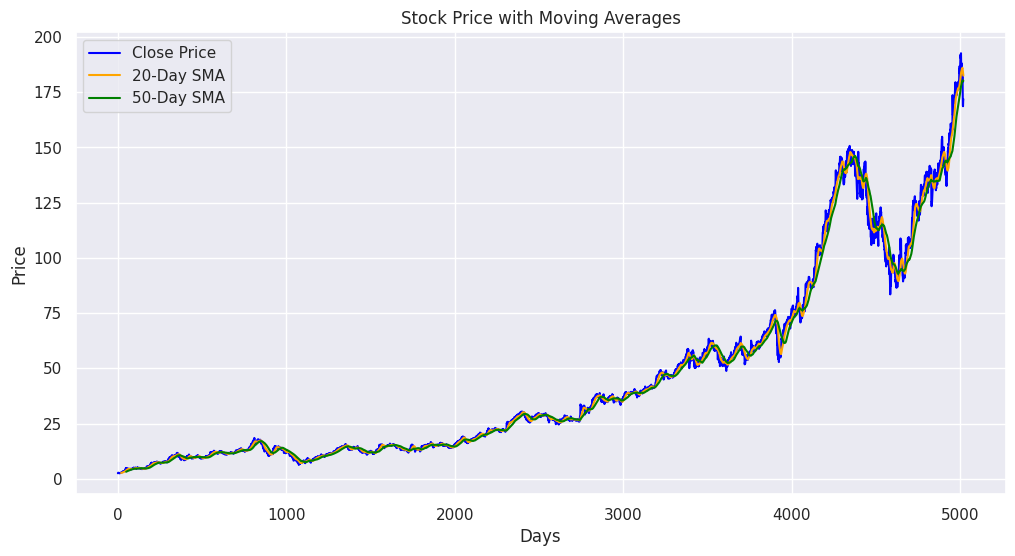

In [67]:
# Visualize the Data
sns.set_theme(style='darkgrid')

# Plot 1: Stock Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['Close'].rolling(window=20).mean(), label='20-Day SMA', color='orange')
plt.plot(data['Close'].rolling(window=50).mean(), label='50-Day SMA', color='green')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()

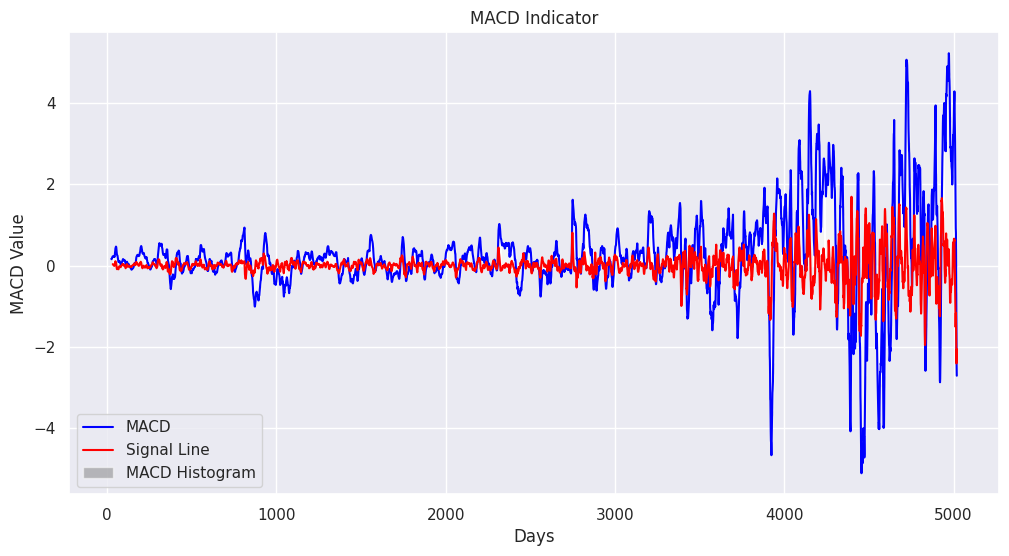

In [68]:
# Plot 2: MACD
# Plot MACD
plt.figure(figsize=(12, 6))
plt.plot(data['macd'], label='MACD', color='blue')
plt.plot(data['macd_signal'], label='Signal Line', color='red')
plt.bar(data.index, data['macd_hist'], label='MACD Histogram', color='gray', alpha=0.5)
plt.title("MACD Indicator")
plt.xlabel("Days")
plt.ylabel("MACD Value")
plt.legend()
plt.show()

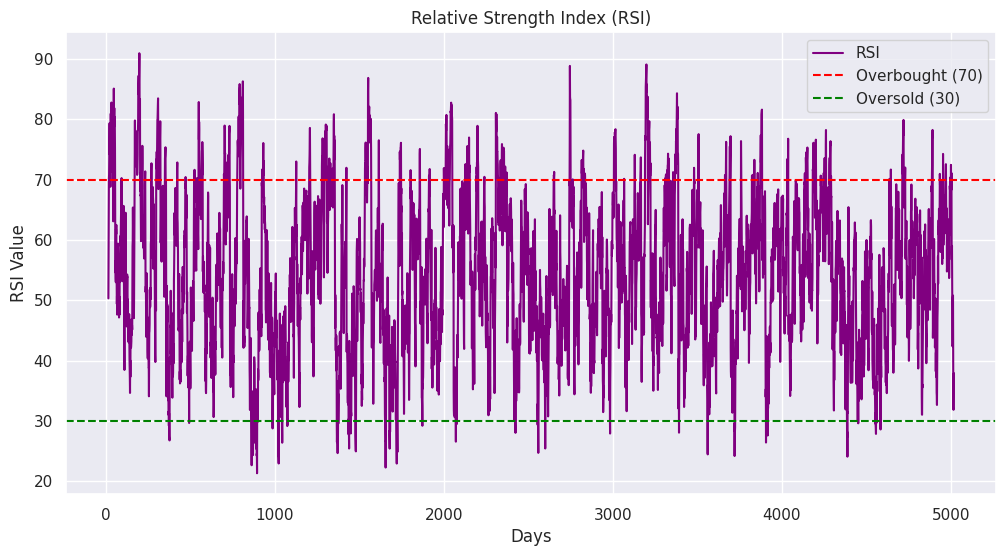

In [69]:
# Plot 3: RSI
plt.figure(figsize=(12, 6))
plt.plot(data['rsi'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("Relative Strength Index (RSI)")
plt.xlabel("Days")
plt.ylabel("RSI Value")
plt.legend()
plt.show()

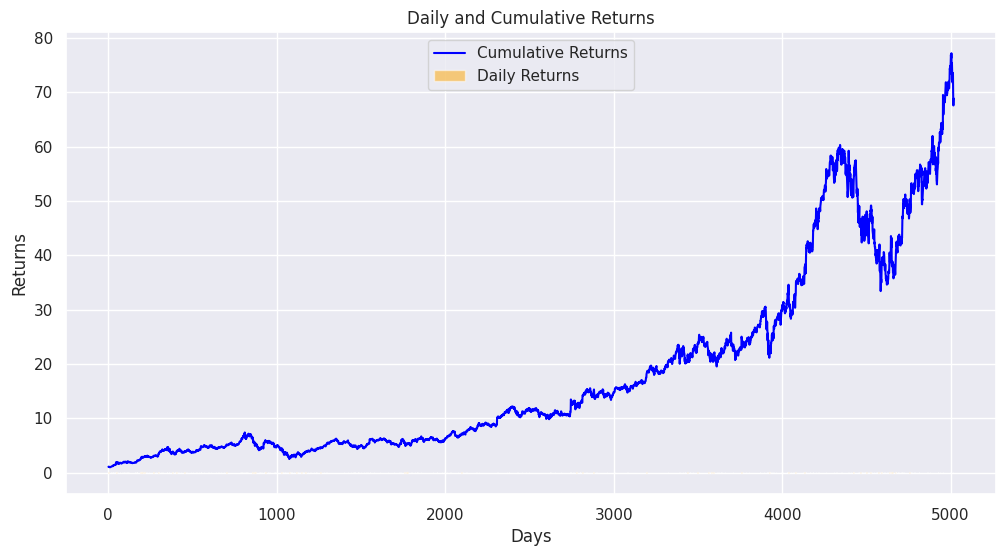

In [70]:
# Plot 4: Daily Returns and Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(data['cumulative_return'], label='Cumulative Returns', color='blue')
plt.bar(data.index, data['daily_return'], label='Daily Returns', color='orange', alpha=0.5)
plt.title("Daily and Cumulative Returns")
plt.xlabel("Days")
plt.ylabel("Returns")
plt.legend()
plt.show()

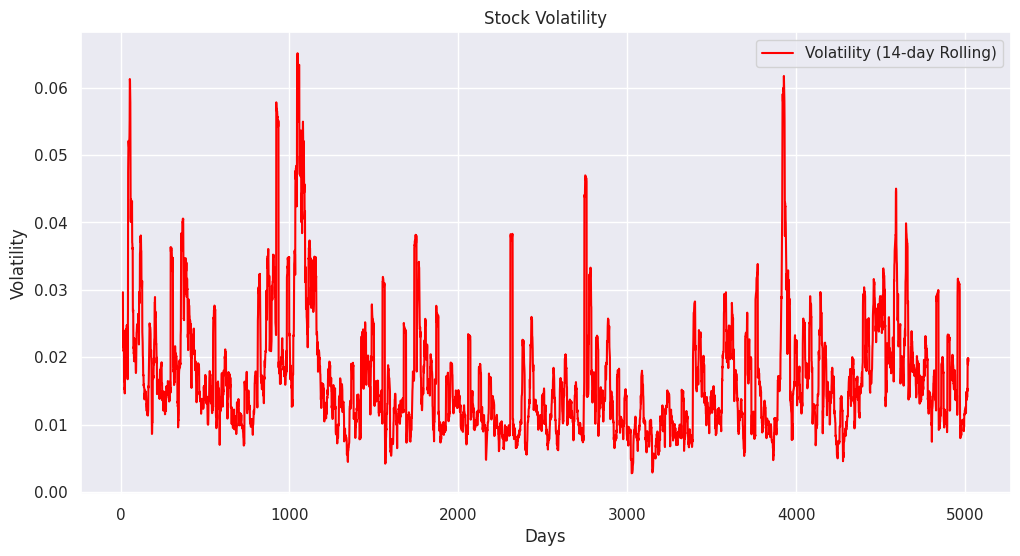

In [71]:
# Plot 5: Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['volatility'], label='Volatility (14-day Rolling)', color='red')
plt.title("Stock Volatility")
plt.xlabel("Days")
plt.ylabel("Volatility")
plt.legend()
plt.show()